In [1]:
from ssd.data.rdd import RDDDataset
import torchvision
from tops.config import LazyCall as L
from ssd.data.transforms.transform import RandomHorizontalFlip, RandomSampleCrop, Resize
from ssd.data.transforms import Normalize, ToTensor, GroundTruthBoxesToAnchors

import pathlib
import skimage.io as io
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import pandas as pd

2023-04-14 13:27:17,798 [INFO ] NumExpr defaulting to 8 threads.


In [2]:
dataset = RDDDataset(
        country="Norway",
        split="train",
        split_ratio=0.8,
        remove_empty=True,
        transform=torchvision.transforms.Compose(transforms=[
            L(RandomSampleCrop)(),
            L(ToTensor)(),
            L(RandomHorizontalFlip)(),
            L(Resize)(imshape="${train.imshape}"),
            L(GroundTruthBoxesToAnchors)(anchors="${anchors}", iou_threshold=0.5),
        ]))

In [3]:
coco = dataset.get_annotations_as_coco()

creating index...
index created!


In [4]:
from pprint import pprint
pprint(next(iter(coco.anns.items())))

(9002,
 {'area': 1696.477191209793,
  'bbox': [1137.4599609375, 1280.9300537109375, 30.8900146484375, 54.919921875],
  'category_id': 1,
  'id': 9002,
  'image_id': 'Norway_000000',
  'iscrowd': 0,
  'segmentation': []})


In [5]:
country = "Norway"

In [6]:
def plot_boxes(imgId, country):
    annotationIds = coco.getAnnIds(imgIds=[imgId])
    annotations = coco.loadAnns(annotationIds)
    data_dir = 'data/rdd2022/RDD2022/' + country + '/train/images'
    I = io.imread(data_dir + "/" + imgId + ".jpg")
    plt.imshow(I)
    plt.axis('on')
    coco.showAnns(annotations, draw_bbox=True )
    plt.show()

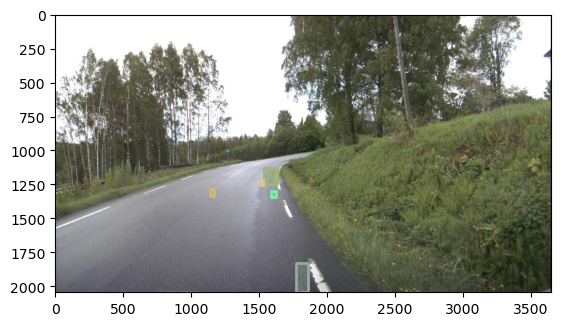

In [7]:
plot_boxes('Norway_000000', 'Norway')

In [8]:
def print_boxes(imgId, country):
    annotationIds = coco.getAnnIds(imgIds=[imgId])
    annotations = coco.loadAnns(annotationIds)
    pprint(annotations)

In [9]:
print_boxes('Norway_000000', 'Norway')

[{'area': 1696.477191209793,
  'bbox': [1137.4599609375, 1280.9300537109375, 30.8900146484375, 54.919921875],
  'category_id': 1,
  'id': 9002,
  'image_id': 'Norway_000000',
  'iscrowd': 0,
  'segmentation': []},
 {'area': 10603.751659423113,
  'bbox': [1536.530029296875,
           1130.7900390625,
           91.530029296875,
           115.8499755859375],
  'category_id': 3,
  'id': 9003,
  'image_id': 'Norway_000000',
  'iscrowd': 0,
  'segmentation': []},
 {'area': 18991.16755068302,
  'bbox': [1772.449951171875,
           1824.969970703125,
           89.239990234375,
           212.81005859375],
  'category_id': 1,
  'id': 9004,
  'image_id': 'Norway_000000',
  'iscrowd': 0,
  'segmentation': []},
 {'area': 1687.3982543945312,
  'bbox': [1588.02001953125, 1295.260009765625, 35.75, 47.199951171875],
  'category_id': 1,
  'id': 9005,
  'image_id': 'Norway_000000',
  'iscrowd': 0,
  'segmentation': []},
 {'area': 753.2887308597565,
  'bbox': [1506.530029296875,
           1215.530

In [10]:
def plot_random(country):
    randomId = random.choice(coco.getImgIds())
    print(randomId)
    plot_boxes(randomId, country)

Norway_007126


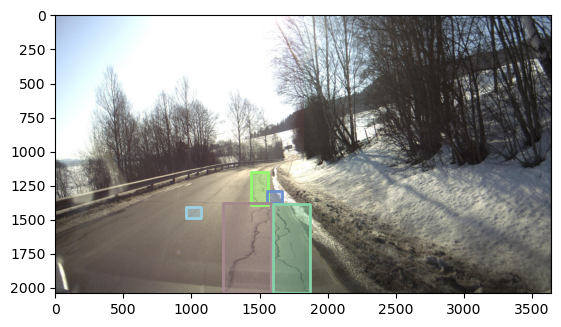

In [11]:
plot_random('Norway')

In [12]:
coco.loadCats(coco.getCatIds())

[{'name': '__background__', 'id': 1, 'supercategory': ''},
 {'name': 'd00', 'id': 2, 'supercategory': ''},
 {'name': 'd10', 'id': 3, 'supercategory': ''},
 {'name': 'd20', 'id': 4, 'supercategory': ''},
 {'name': 'd40', 'id': 5, 'supercategory': ''}]

In [13]:
print(len(coco.getAnnIds(catIds=1)))
print(len(coco.getAnnIds(catIds=2)))
print(len(coco.getAnnIds(catIds=3)))
print(len(coco.getAnnIds(catIds=4)))
print(len(coco.getAnnIds(catIds=5)))

6914
1413
367
359
0


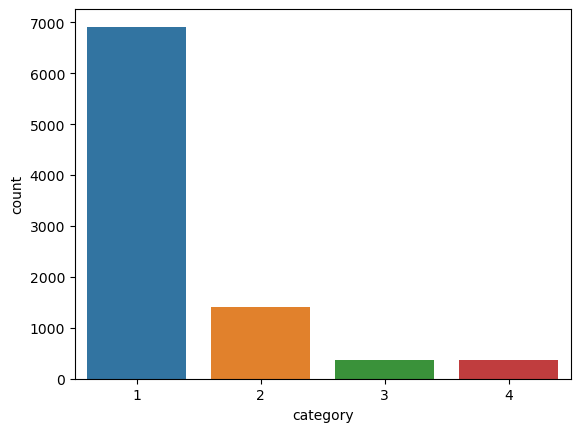

In [14]:
array = np.array([annotation['category_id'] for annotation in coco.loadAnns(coco.getAnnIds())])
df = pd.DataFrame(array, columns=["category"])

sns.countplot(x="category", data=df)
plt.show()

In [15]:
next(iter(coco.loadAnns(coco.getAnnIds())))

{'bbox': [1137.4599609375, 1280.9300537109375, 30.8900146484375, 54.919921875],
 'area': 1696.477191209793,
 'category_id': 1,
 'image_id': 'Norway_000000',
 'id': 9002,
 'iscrowd': 0,
 'segmentation': []}

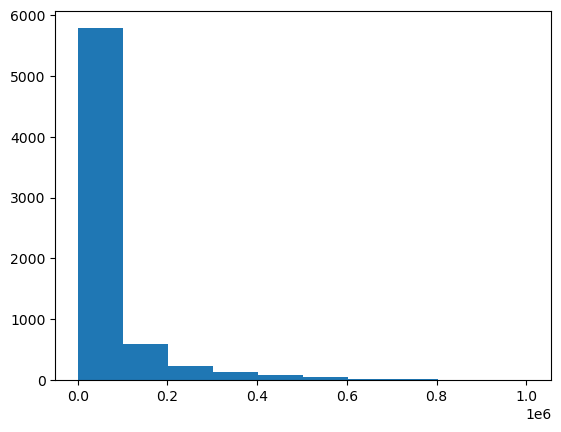

In [16]:
area_1 = np.array([annotation['area'] for annotation in coco.loadAnns(coco.getAnnIds(catIds=1))])
plt.hist(area_1)
plt.show()

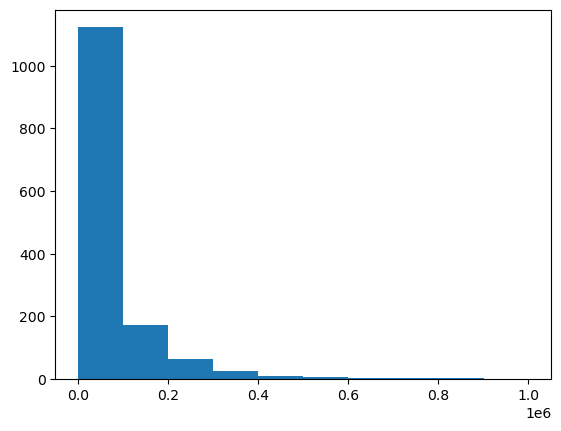

In [17]:
area_2 = np.array([annotation['area'] for annotation in coco.loadAnns(coco.getAnnIds(catIds=2))])
plt.hist(area_2)
plt.show()

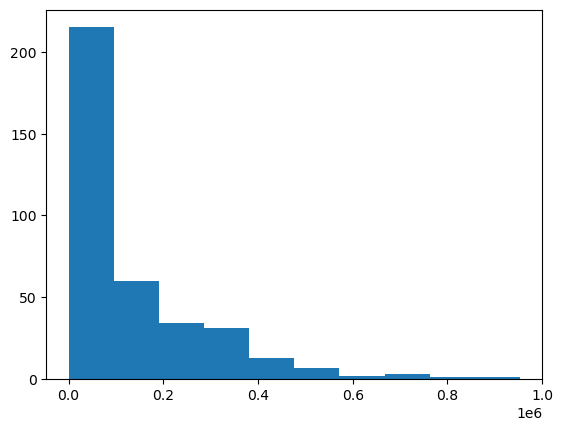

In [18]:
area_3 = np.array([annotation['area'] for annotation in coco.loadAnns(coco.getAnnIds(catIds=3))])
plt.hist(area_3)
plt.show()

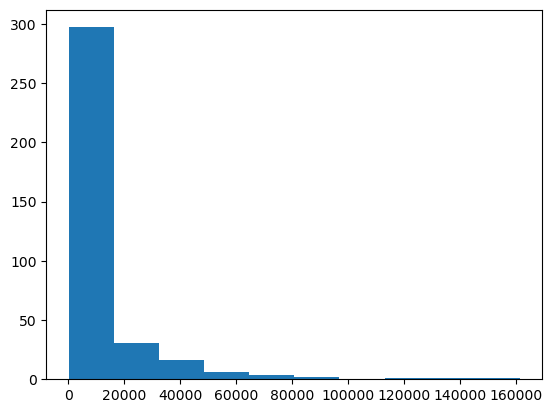

In [19]:
area_4 = np.array([annotation['area'] for annotation in coco.loadAnns(coco.getAnnIds(catIds=4))])
plt.hist(area_4)
plt.show()

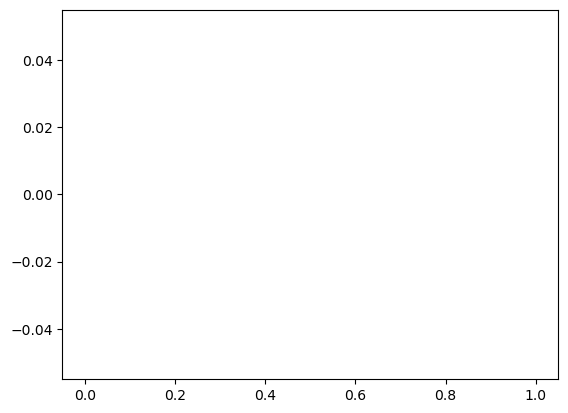

In [20]:
area_5 = np.array([annotation['area'] for annotation in coco.loadAnns(coco.getAnnIds(catIds=5))])
plt.hist(area_5)
plt.show()